In [9]:
import numpy as np
import pandas as pd
import random
import skimage.io
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
%matplotlib inline

print(check_output(["ls"]).decode("utf8"))

EDA.ipynb
Nuclei.ipynb
stage1_sample_submission.csv
stage1_test
stage1_train
stage1_train_labels.csv



# Look at some images

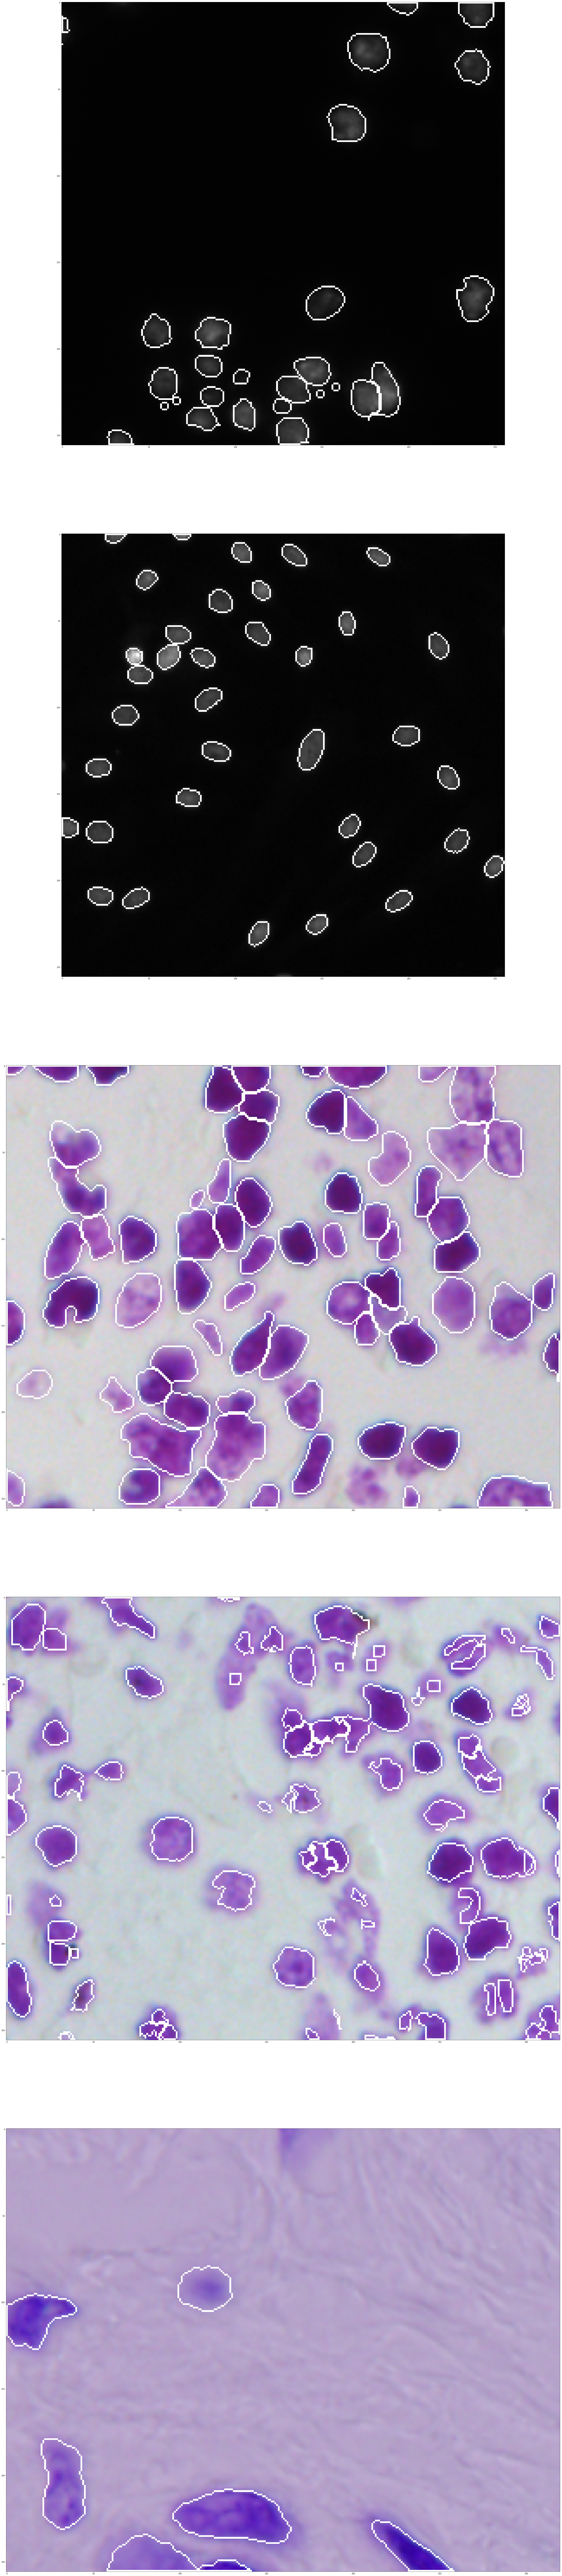

In [2]:
from skimage import morphology

def read_image_labels(image_id):
    image_file = "stage1_train/{}/images/{}.png".format(image_id,image_id)
    mask_file = "stage1_train/{}/masks/*.png".format(image_id)
    image = skimage.io.imread(image_file)
    masks = skimage.io.imread_collection(mask_file).concatenate()
    height, width, _ = image.shape
    num_masks = masks.shape[0]
    maxValue = np.max(image)
    for index in range(num_masks):
        contour = np.logical_xor(masks[index], morphology.binary_erosion(masks[index]))
        image[contour > 0] = maxValue
    return image

def plot_images_masks(image_ids):
    plt.close('all')
    fig, ax = plt.subplots(nrows=len(image_ids),ncols=1, figsize=(256,256))
    for ax_index, image_id in enumerate(image_ids):
        image = read_image_labels(image_id)
        ax[ax_index].imshow(image)
        
image_ids = check_output(["ls", "stage1_train/"]).decode("utf8").split()
show_image = image_ids[:5]
plot_images_masks(show_image)

# Read in csv

In [4]:
train = pd.read_csv('stage1_train_labels.csv')
train.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [19]:
train_image_id = check_output(["ls", "stage1_train/"]).decode("utf8").split()
test_image_id = check_output(["ls", "stage1_test/"]).decode("utf8").split()

print(len(train_image_id))
image_size = []
num_mask = []
for image_id in train_image_id:
    path = "stage1_train/{}/images/{}.png".format(image_id,image_id)
    image = skimage.io.imread(path)
    image_size.append(image.shape)
    mask_id = check_output(["ls", "stage1_train/{}/masks/".format(image_id)]).decode("utf8").split()
    n_mask = len(mask_id)
    num_mask.append(n_mask)
for image_id in test_image_id:
    path = "stage1_test/{}/images/{}.png".format(image_id,image_id)
    image = skimage.io.imread(path)
    image_size.append(image.shape)
    num_mask.append(0)


size = pd.DataFrame({'image_size':image_size, 'num_mask':num_mask})
size['image_size'].value_counts()


670


(256, 256, 4)      354
(256, 320, 4)      112
(520, 696, 4)       96
(360, 360, 4)       91
(512, 640, 4)       21
(1024, 1024, 4)     16
(260, 347, 4)        9
(512, 680, 3)        8
(603, 1272, 4)       6
(524, 348, 3)        4
(256, 256, 3)        4
(520, 348, 3)        4
(519, 253, 3)        4
(519, 162, 3)        2
(519, 161, 3)        2
(1040, 1388, 4)      1
(390, 239, 4)        1
Name: image_size, dtype: int64

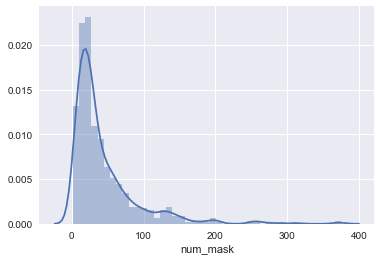

In [20]:
sns.distplot(size['num_mask'][:670])